use the dlib face detector and apply it to an image

In [1]:
#Step 0
#Run the necessary imports.

import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

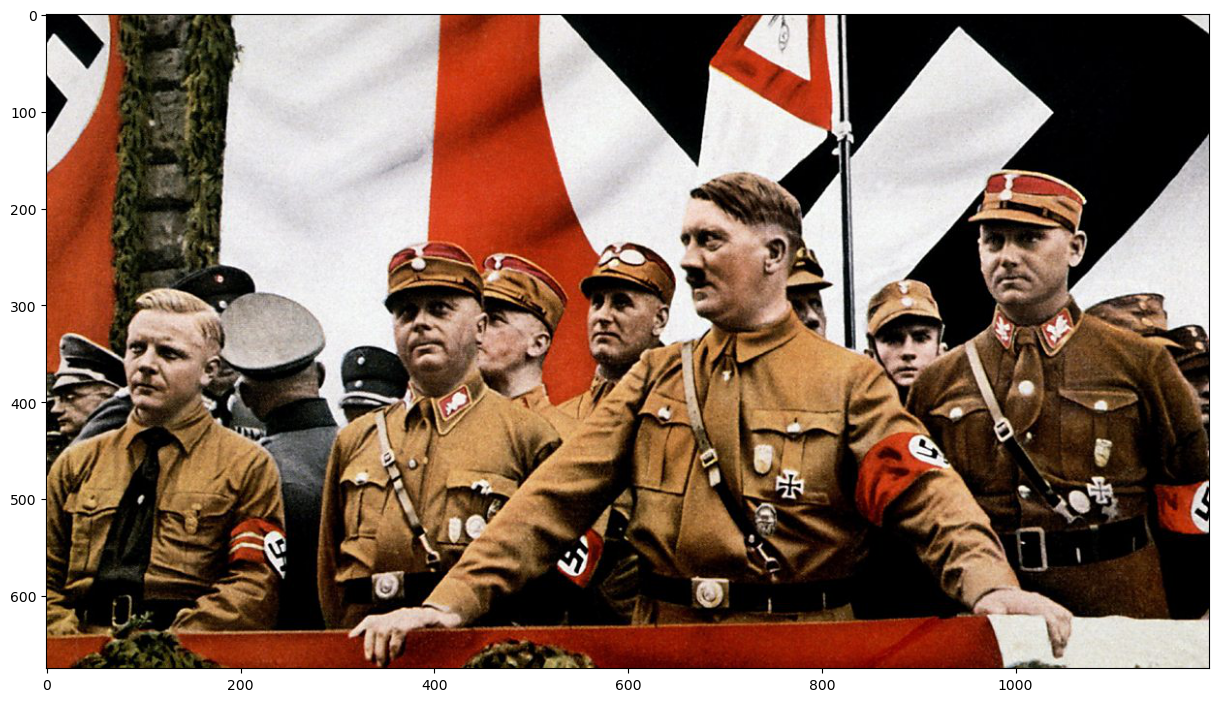

In [2]:
#Step 1
#Load an image (any image that contains faces).

# Load image
img = cv2.imread('nazi.jpg')

# Convert it to RGB
rows, cols, channels = img.shape
img_rgb = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        img_rgb[r, c, 0] = pixel[2]
        img_rgb[r, c, 1] = pixel[1]
        img_rgb[r, c, 2] = pixel[0]
        
plt.imshow(img_rgb)

In [3]:
# I want also to apply Viola-Jones algorithm as it was in an example 

casc_path = r'C:\Users\hanna\ComputerVision\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(casc_path)

img_vj = cv2.imread('nazi.jpg')
img_vj = cv2.cvtColor(img_vj, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_vj, cv2.COLOR_RGB2GRAY)

# minNeighbors = 0 shows all the detection at all scale, a value of approx. 5 shall felter out all the spurious detections
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)

print('Number of detected faces:', len(faces))

# Draw rectangle around each face
result = np.copy(img_vj)
faces_img = []
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_img.append(img_vj[y:y+h, x:x+w, :])
    
#plt.imshow(result)

#plt.subplot(121), plt.imshow(result, cmap='gray')
#plt.subplot(122), plt.imshow(faces_img[0])

Number of detected faces: 5


Number of detected faces: 4
rectangles[[(66, 315) (155, 405)], [(851, 312) (925, 387)], [(952, 206) (1041, 295)], [(544, 271) (619, 345)]]
<bound method PyCapsule.left of rectangle(66,315,155,405)>
66 315 89 90
851 312 74 75
952 206 89 89
544 271 75 74


(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

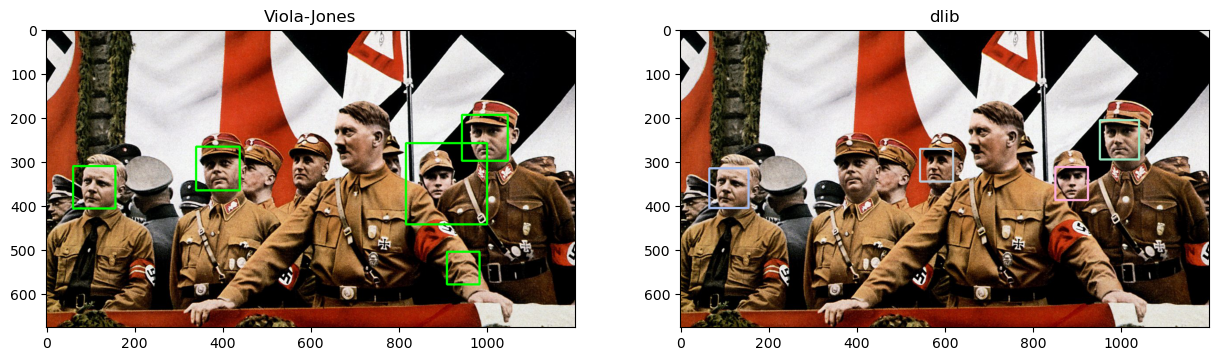

In [4]:
#Step 2 
# Load the dlib face predictor.

import dlib
predictor = dlib.shape_predictor(r'C:\Users\hanna\ComputerVision\shape_predictor_68_face_landmarks.dat')

# load the detector
detector = dlib.get_frontal_face_detector()

#Step 3
#Run the predictor on your image.

# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(gray, 1)
print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

#Step 4
#Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

result_dlib = np.copy(img_rgb)
faces_dlib_img = []

for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    
    # use only light colors
    color = (np.random.randint(150, 256),  # Red channel value between 150-255
             np.random.randint(150, 256),  # Green channel value between 150-255
             np.random.randint(150, 256))  # Blue channel value between 150-255
    
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img_rgb[y:y+h, x:x+w, :])
    
plt.subplot(121), plt.imshow(result), plt.title('Viola-Jones')
plt.subplot(122), plt.imshow(result_dlib), plt.title('dlib')

[(17, 31), (16, 39), (15, 48), (16, 56), (16, 66), (18, 75), (21, 83), (26, 90), (36, 91), (47, 92), (59, 90), (70, 87), (80, 81), (87, 73), (91, 63), (93, 53), (95, 43), (18, 23), (22, 20), (27, 20), (33, 21), (38, 24), (47, 26), (55, 25), (64, 26), (72, 29), (79, 33), (41, 30), (39, 36), (37, 41), (35, 46), (30, 53), (33, 55), (36, 56), (41, 56), (46, 56), (22, 29), (25, 27), (30, 28), (35, 32), (30, 33), (25, 32), (54, 35), (59, 32), (65, 33), (69, 37), (64, 38), (59, 37), (26, 69), (29, 66), (33, 65), (36, 66), (39, 66), (45, 69), (52, 73), (44, 74), (38, 74), (35, 74), (32, 73), (29, 71), (28, 69), (33, 68), (36, 69), (39, 69), (50, 72), (38, 70), (35, 69), (33, 69)]
[(6, 26), (6, 33), (8, 41), (11, 48), (14, 56), (18, 62), (24, 68), (30, 73), (37, 73), (44, 72), (50, 67), (56, 61), (62, 54), (66, 47), (67, 39), (68, 31), (69, 23), (10, 18), (15, 14), (21, 13), (27, 13), (33, 15), (41, 16), (47, 14), (52, 13), (58, 13), (62, 15), (38, 22), (38, 27), (39, 32), (39, 37), (33, 43), (

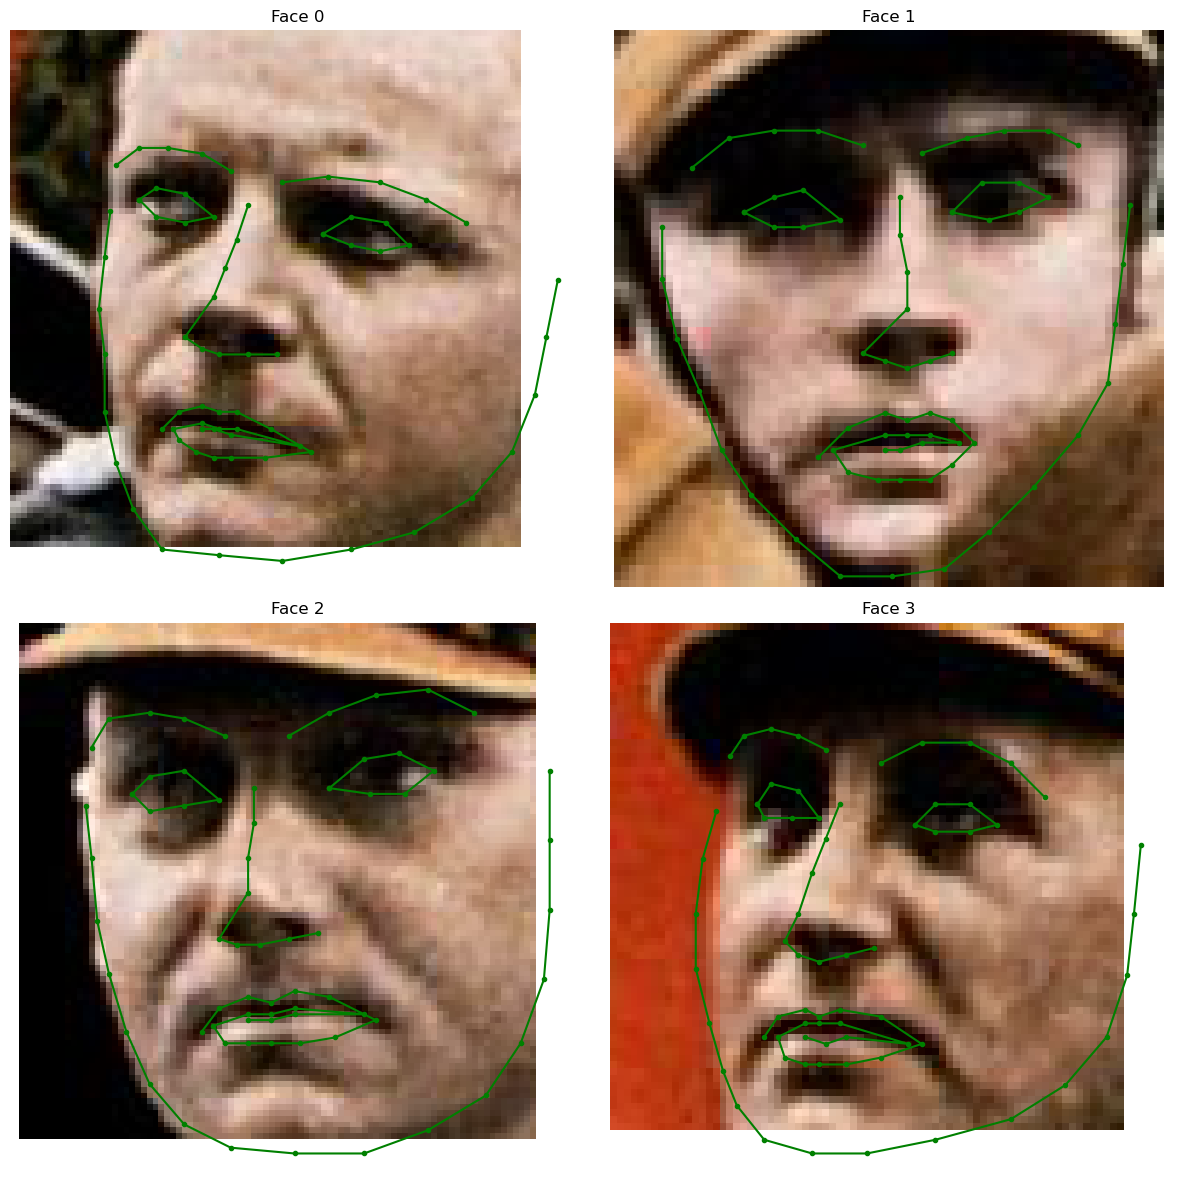

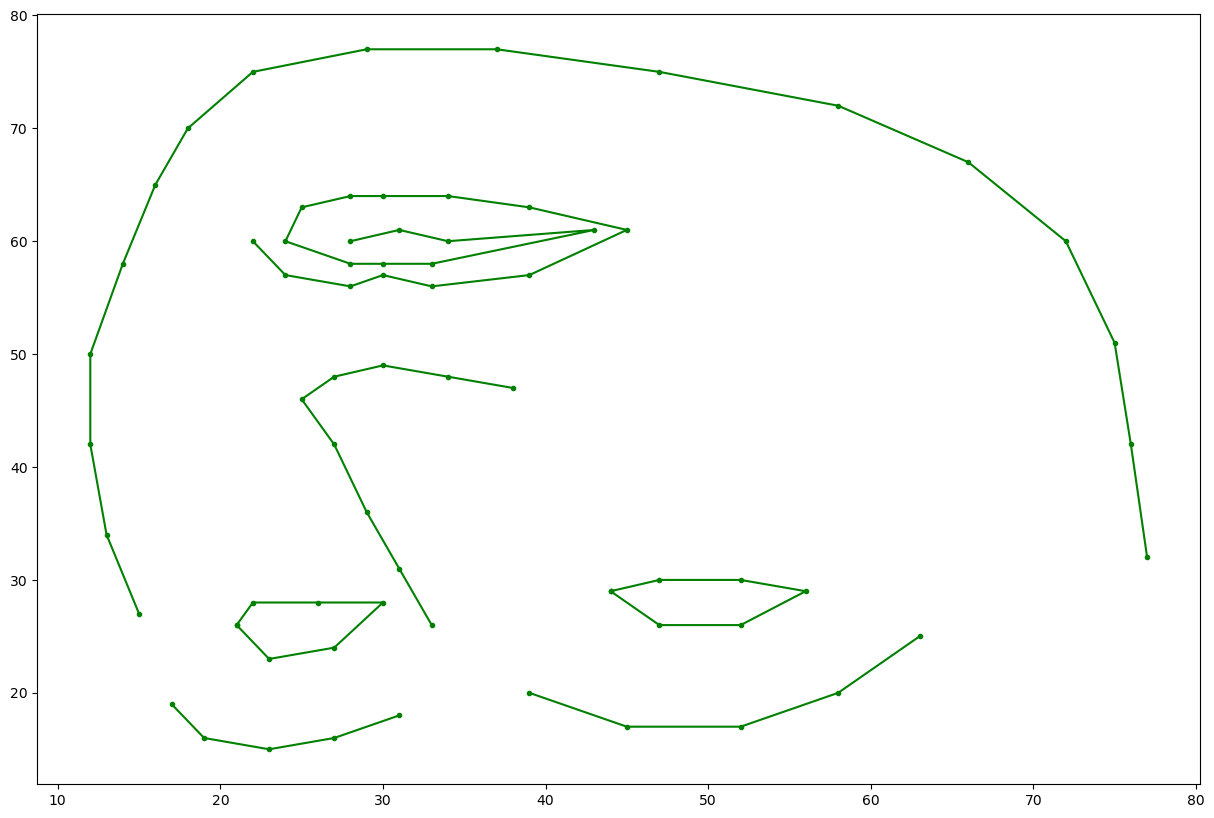

In [5]:
face0 = faces_dlib_img[0]
face1 = faces_dlib_img[1]
face2 = faces_dlib_img[2]
face3 = faces_dlib_img[3]
faces = [face0, face1, face2, face3]

plt.figure(figsize=(12, 12))
def plot_landmarks(vec):
    plt.plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    plt.plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    plt.plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    plt.plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    plt.plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    plt.plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    plt.plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose

for i, face in enumerate(faces):
    # Get dimensions of the current face
    rows, cols, _ = face.shape
    rect = dlib.rectangle(0, 0, cols, rows)

    shape = predictor(cv2.cvtColor(face, cv2.COLOR_RGB2GRAY), rect)
    # Convert landmarks to ndarray for better manipulation
    kps = list(map(lambda p: (p.x, p.y), shape.parts()))
    landmarks = np.array(kps)
    print(kps)

    plt.subplot(2, 2, i + 1)
    plt.imshow(face)
    plot_landmarks(landmarks)
    plt.title(f'Face {i}')
    plt.axis('off')


plt.tight_layout()
plt.show()

plot_landmarks(landmarks)

In [6]:
!pip install --upgrade opencv-python
!pip install --upgrade opencv-python-headless


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0


error: uninstall-no-record-file

Cannot uninstall opencv-python 4.10.0

The package's contents are unknown: no RECORD file was found for opencv-python.

hint: The package was installed by conda. You should check if it can uninstall the package.


  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0


error: uninstall-no-record-file

Cannot uninstall opencv-python-headless 4.10.0

The package's contents are unknown: no RECORD file was found for opencv-python-headless.

hint: The package was installed by conda. You should check if it can uninstall the package.


In [7]:
# Initialize detector
detector = cv2.FaceDetectorYN.create("face_detection_yunet_2022mar.onnx", "", (320, 320))

# Read image
source = cv2.imread('nazi.jpg')
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
rows, cols, _ = source.shape

# Get image shape
img_W = int(source.shape[1])
img_H = int(source.shape[0])

# Set input size
detector.setInputSize((cols, rows))

# Run detector
faces_src = detector.detect(source)
assert faces_src[0]

# Show detected faces on image
result = np.copy(source)
faces_src_img = []

for face in faces_src[1]:
    # Draw box
    x1, y1, w, h = face[0:4]
    faces_src_img.append(source[int(y1):int(y1+h), int(x1):int(x1+h), :])
    cv2.rectangle(result, (int(x1), int(y1)), (int(x1+w), int(y1+h)), color=(0, 255, 0), thickness=2)    

    # Draw landmarks
    for idx in range(4, len(face)-1, 2):        
        cv2.circle(result, (int(face[idx]), int(face[idx+1])), radius=4, color=(0, 255, 0), thickness=-1)            

plt.imshow(result)

error: OpenCV(4.10.0) C:\b\abs_daut97tdpo\croot\opencv-suite_1722029138522\work\modules\dnn\src\net_impl.cpp:279: error: (-204:Requested object was not found) Layer with requested id=-1 not found in function 'cv::dnn::dnn4_v20240521::Net::Impl::getLayerData'
